**Goal:** To locate outliers in the dataframe and decide what to do with them

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
%matplotlib inline  

In [4]:
pd.options.display.max_columns = None

In [9]:
df = pd.read_csv('../data/curated/features_rounded_news_USD_pair_EURUSD_2007_2018.csv')

In [10]:
df.head(2)

,actual,country,datetime,forecast,forecast_error,impact,new,previous,previous_error,week,datetime_gmt,forecast_error_ratio,year,quarter,month,weekday,open_released,high_released,low_released,close_released,high_0_5_after,low_0_5_after,close_0_5_after,volatility_0_5_after,direction_candle_0_5_after,direction_agg_0_5_after,pips_agg_0_5_after,pips_candle_0_5_after,high_5_10_after,low_5_10_after,close_5_10_after,volatility_5_10_after,direction_candle_5_10_after,direction_agg_5_10_after,pips_agg_5_10_after,pips_candle_5_10_after,high_10_15_after,low_10_15_after,close_10_15_after,volatility_10_15_after,direction_candle_10_15_after,direction_agg_10_15_after,pips_agg_10_15_after,pips_candle_10_15_after,high_15_20_after,low_15_20_after,close_15_20_after,volatility_15_20_after,direction_candle_15_20_after,direction_agg_15_20_after,pips_agg_15_20_after,pips_candle_15_20_after,high_20_25_after,low_20_25_after,close_20_25_after,volatility_20_25_after,direction_candle_20_25_after,direction_agg_20_25_after,pips_agg_20_25_after,pips_candle_20_25_after,high_25_30_after,low_25_30_after,close_25_30_after,volatility_25_30_after,direction_candle_25_30_after,direction_agg_25_30_after,pips_agg_25_30_after,pips_candle_25_30_after,high_5_0_before,low_5_0_before,close_5_0_before,volatility_5_0_before,direction_candle_5_0_before,direction_agg_5_0_before,pips_candle_5_0_before,pips_agg_5_0_before,high_10_5_before,low_10_5_before,close_10_5_before,volatility_10_5_before,direction_candle_10_5_before,direction_agg_10_5_before,pips_candle_10_5_before,pips_agg_10_5_before,high_15_10_before,low_15_10_before,close_15_10_before,volatility_15_10_before,direction_candle_15_10_before,direction_agg_15_10_before,pips_candle_15_10_before,pips_agg_15_10_before,high_20_15_before,low_20_15_before,close_20_15_before,volatility_20_15_before,direction_candle_20_15_before,direction_agg_20_15_before,pips_candle_20_15_before,pips_agg_20_15_before,high_25_20_before,low_25_20_before,close_25_20_before,volatility_25_20_before,direction_candle_25_20_before,direction_agg_25_20_before,pips_candle_25_20_before,pips_agg_25_20_before,high_30_25_before,low_30_25_before,close_30_25_before,volatility_30_25_before,direction_candle_30_25_before,direction_agg_30_25_before,pips_candle_30_25_before,pips_agg_30_25_before,high_30_45_after,low_30_45_after,close_30_45_after,volatility_30_45_after,direction_candle_30_45_after,direction_agg_30_45_after,pips_agg_30_45_after,pips_candle_30_45_after,high_45_60_after,low_45_60_after,close_45_60_after,volatility_45_60_after,direction_candle_45_60_after,direction_agg_45_60_after,pips_agg_45_60_after,pips_candle_45_60_after,high_45_30_before,low_45_30_before,close_45_30_before,volatility_45_30_before,direction_candle_45_30_before,direction_agg_45_30_before,pips_candle_45_30_before,pips_agg_45_30_before,high_60_45_before,low_60_45_before,close_60_45_before,volatility_60_45_before,direction_candle_60_45_before,direction_agg_60_45_before,pips_candle_60_45_before,pips_agg_60_45_before,high_30_60_after,low_30_60_after,close_30_60_after,volatility_30_60_after,direction_candle_30_60_after,direction_agg_30_60_after,pips_agg_30_60_after,pips_candle_30_60_after,high_60_90_after,low_60_90_after,close_60_90_after,volatility_60_90_after,direction_candle_60_90_after,direction_agg_60_90_after,pips_agg_60_90_after,pips_candle_60_90_after,high_90_120_after,low_90_120_after,close_90_120_after,volatility_90_120_after,direction_candle_90_120_after,direction_agg_90_120_after,pips_agg_90_120_after,pips_candle_90_120_after,high_120_150_after,low_120_150_after,close_120_150_after,volatility_120_150_after,direction_candle_120_150_after,direction_agg_120_150_after,pips_agg_120_150_after,pips_candle_120_150_after,high_150_180_after,low_150_180_after,close_150_180_after,volatility_150_180_after,direction_candle_150_180_after,direction_agg_150_180_after,pips_agg_150_180_after,pips_candle_150_180_after,high_180_210_after,low_180_210_after,close_180_210_after,volatility_180_210_after,di

In [112]:
columns_of_interest_numeric = [column for column in df.columns  if column.split('_')[0] in ['volatility', 'pips']  ]
columns_of_interest_numeric = columns_of_interest_numeric + ['forecast_error_ratio', 'total_error_ratio', 'forecast_error_ratio_zscore', 'total_error_ratio_zscore'] 

In [117]:
columns_of_interest_categorical = ['forecast_error', 'impact', 'previous_error', 'direction_agg_5_10_after', 'direction_agg_25_30_after', 'direction_agg_210_240_after'] 

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cc92ba8>,
      dtype=object)

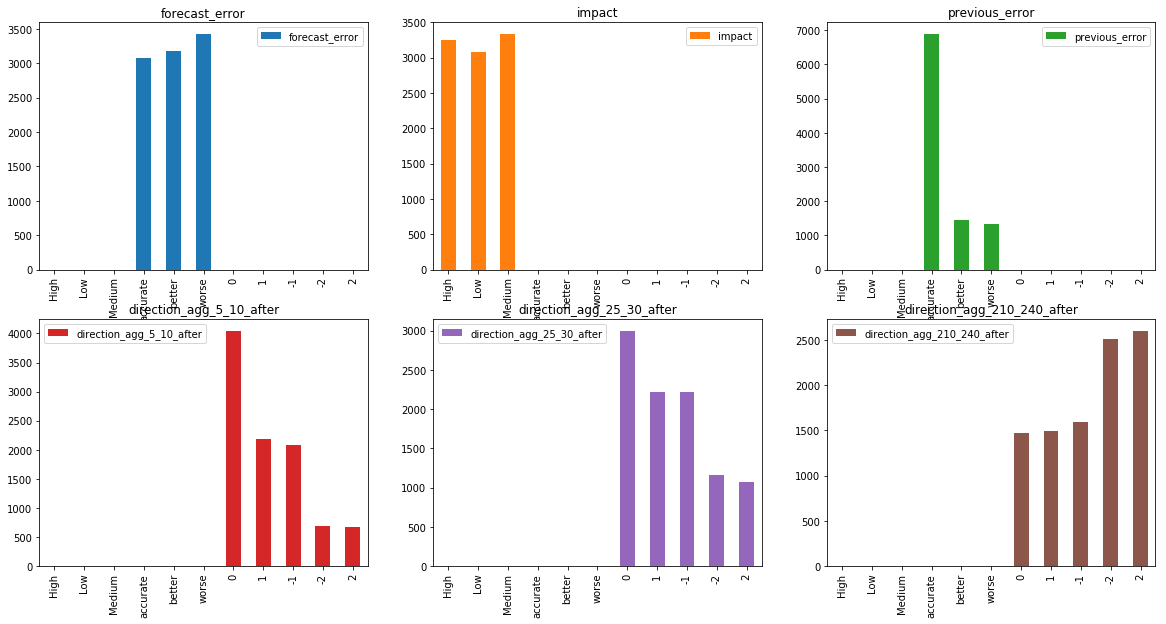

In [118]:
df[columns_of_interest_categorical].apply(pd.value_counts).plot(kind='bar', subplots=True, sharex=False, layout=(2,3),figsize=(20,10))

In [119]:
len(columns_of_interest_numeric)

94

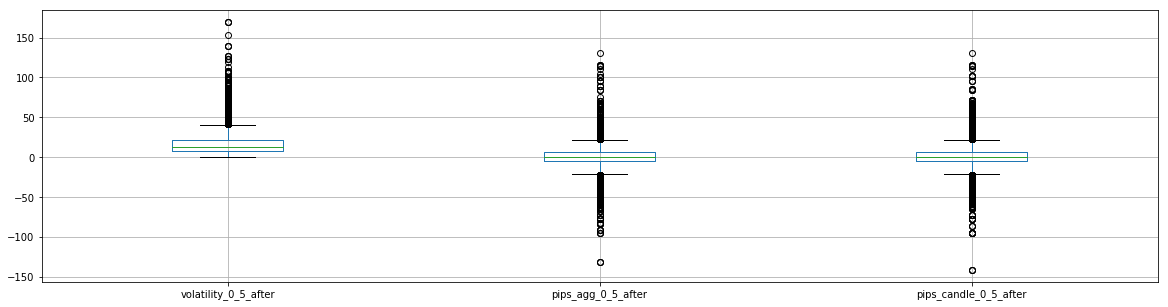

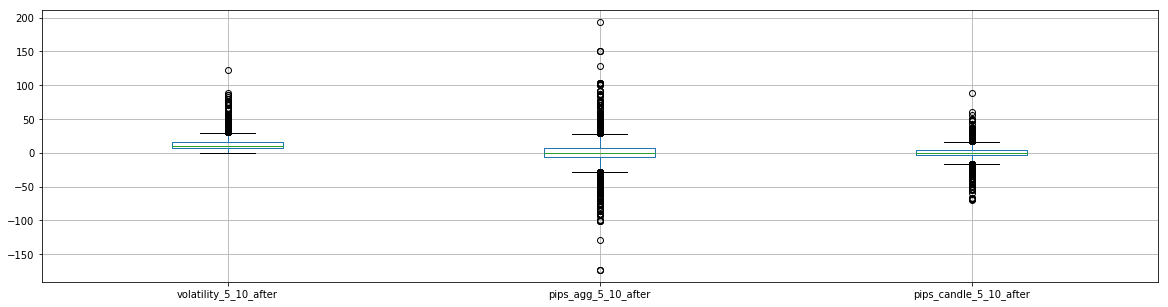

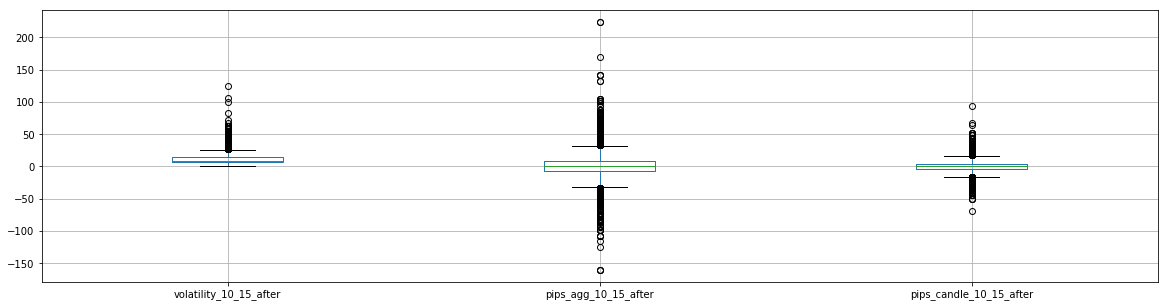

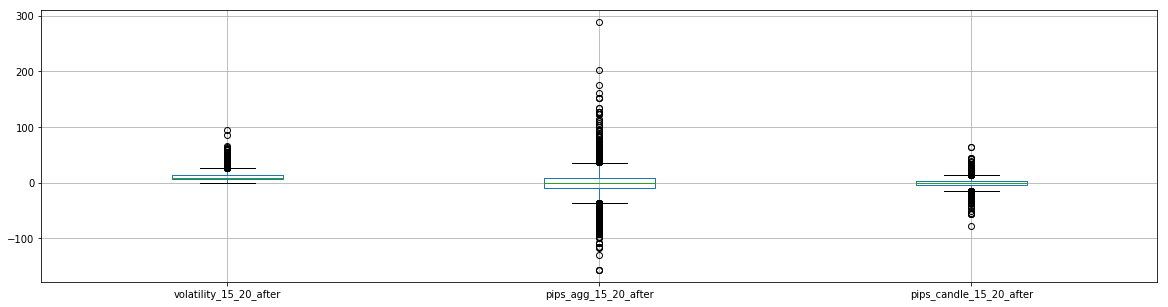

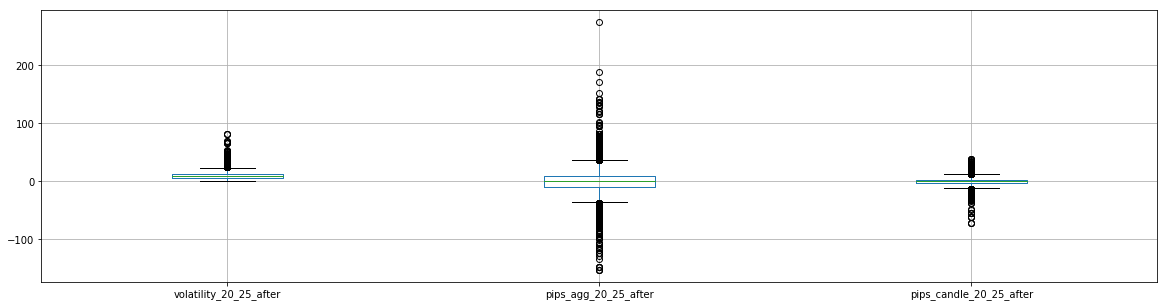

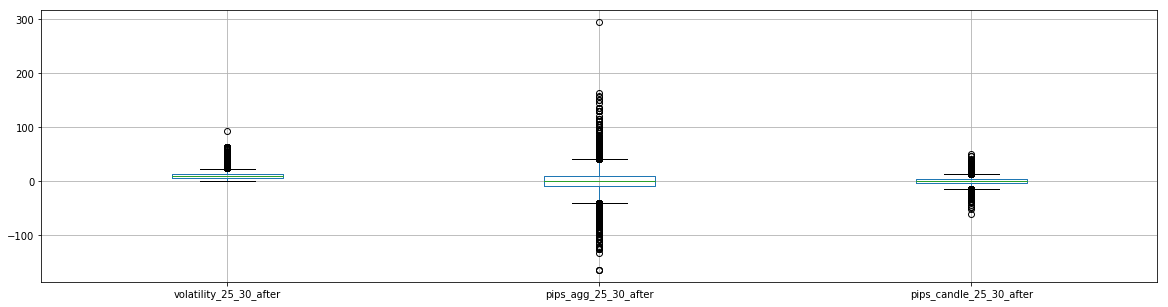

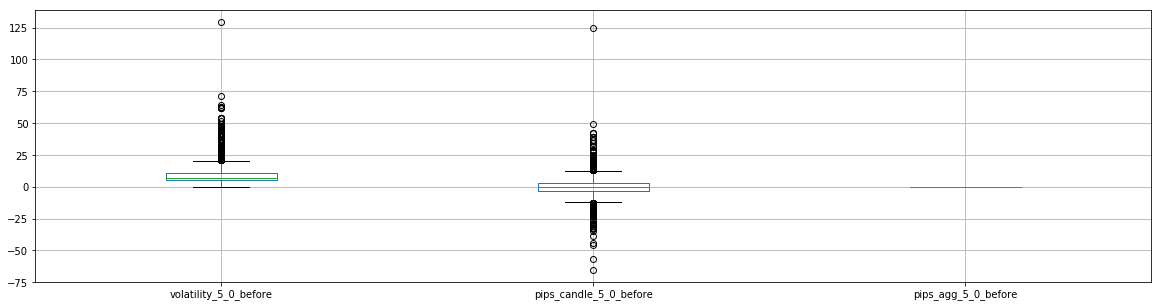

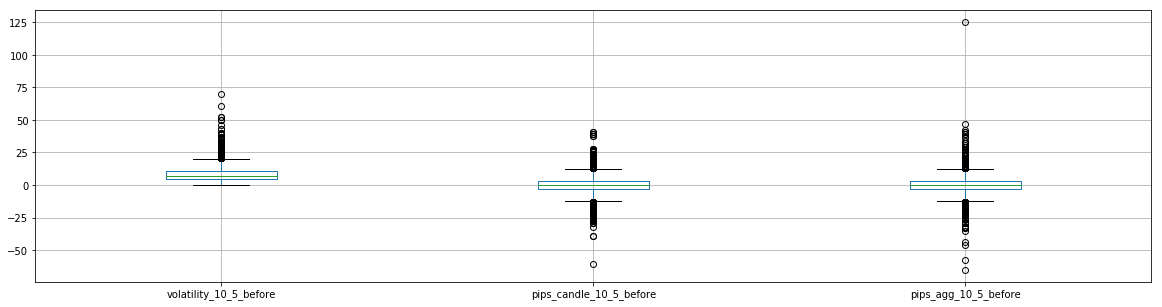

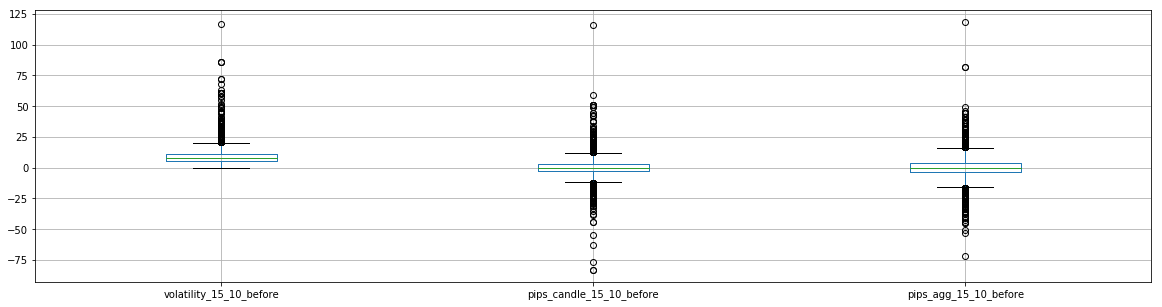

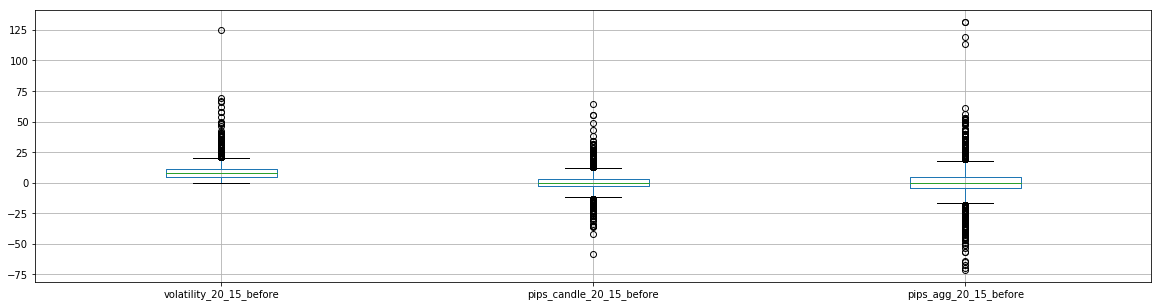

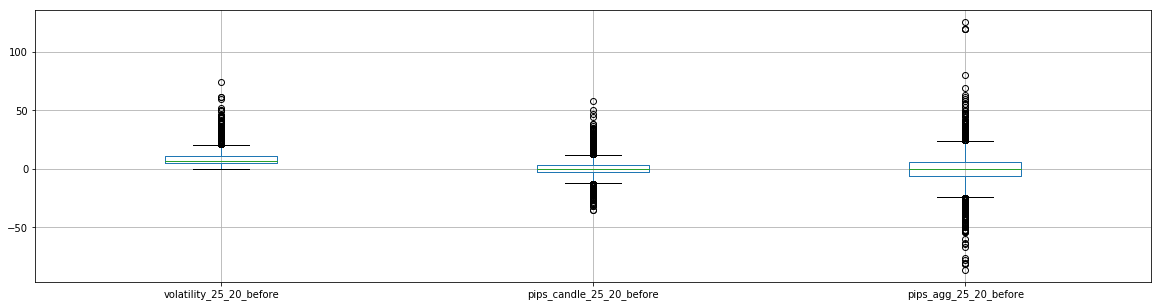

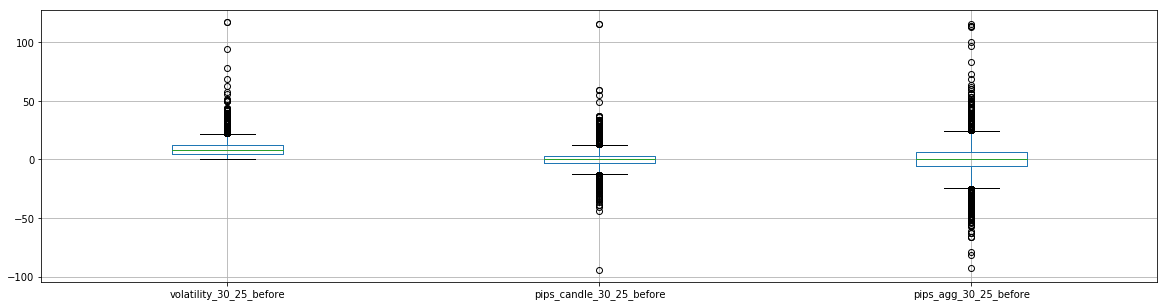

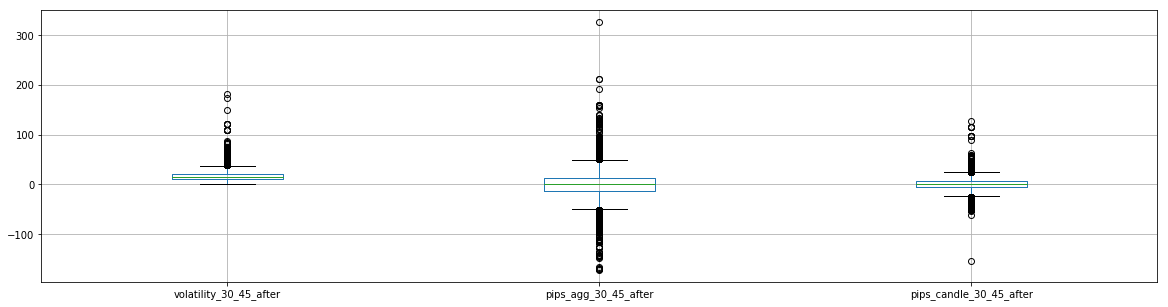

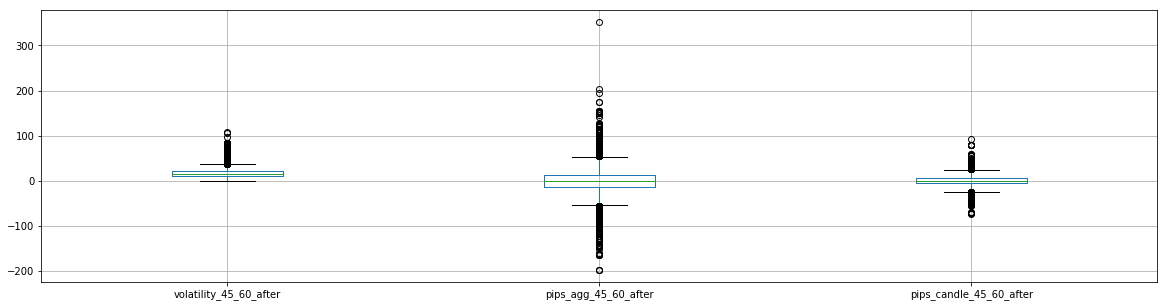

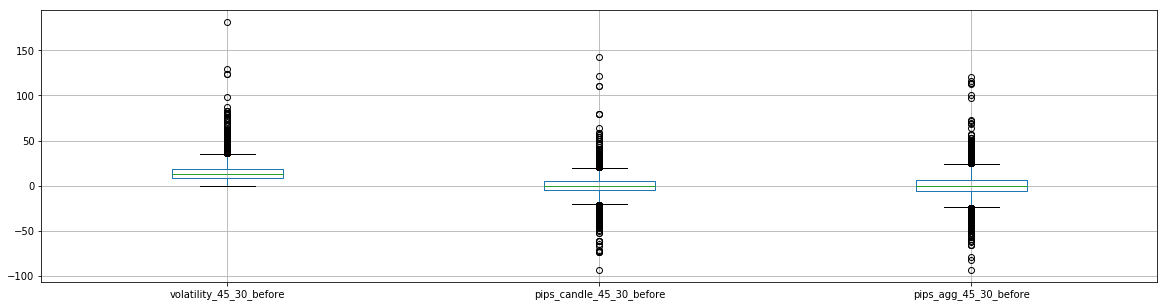

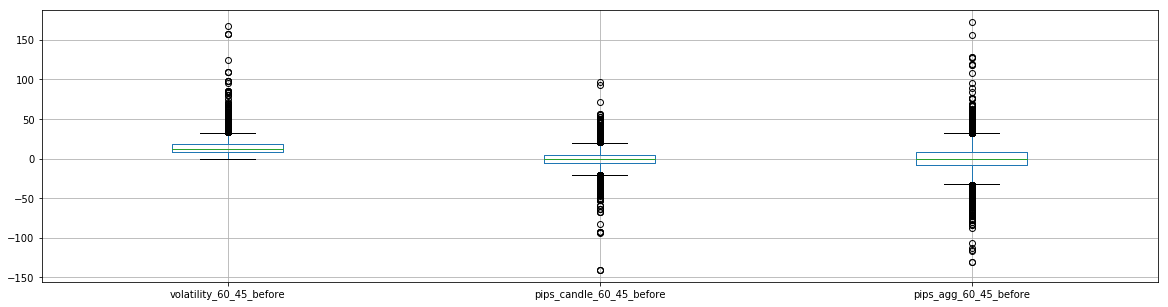

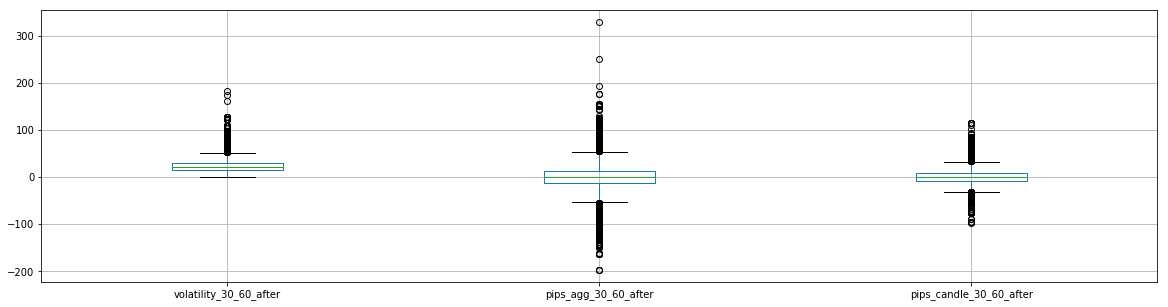

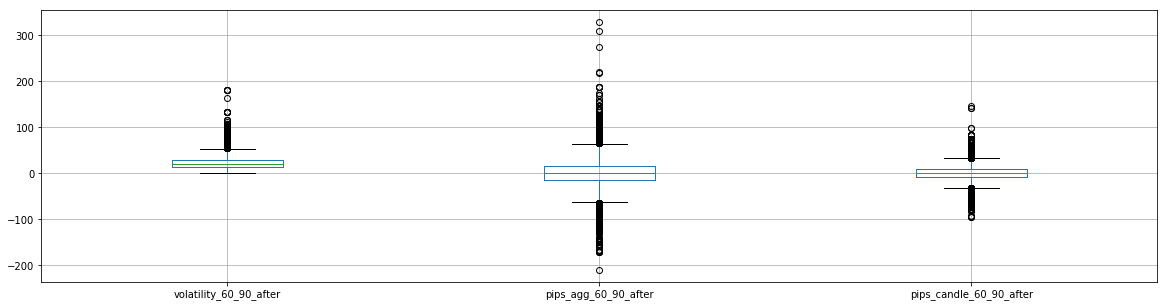

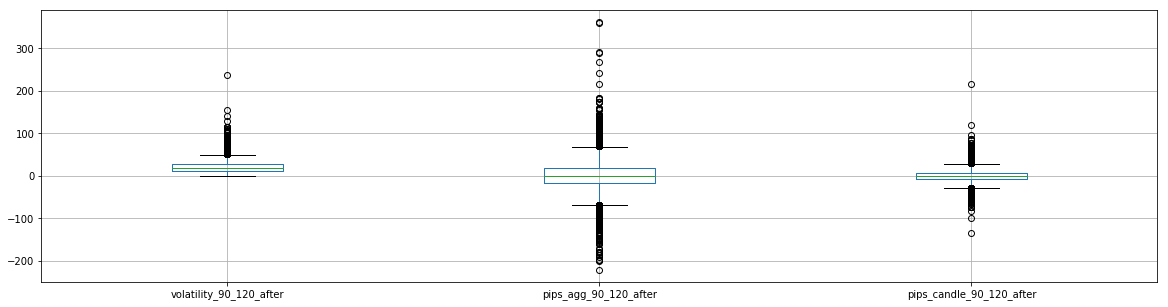

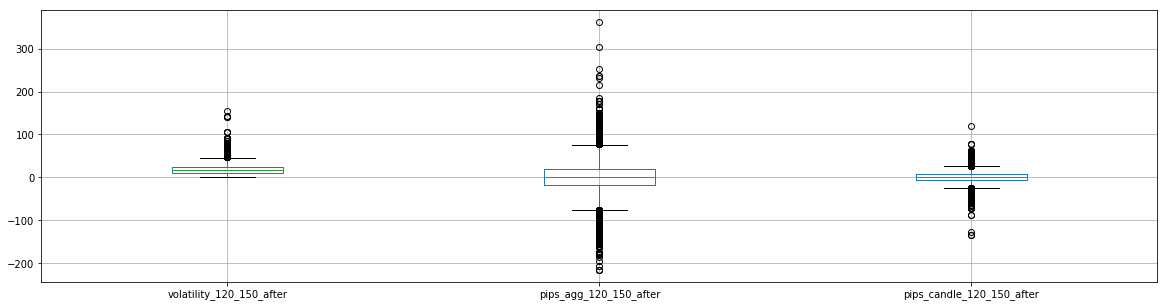

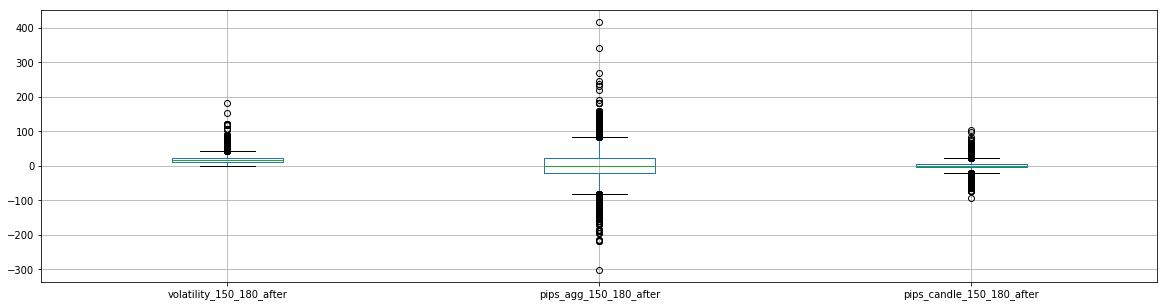

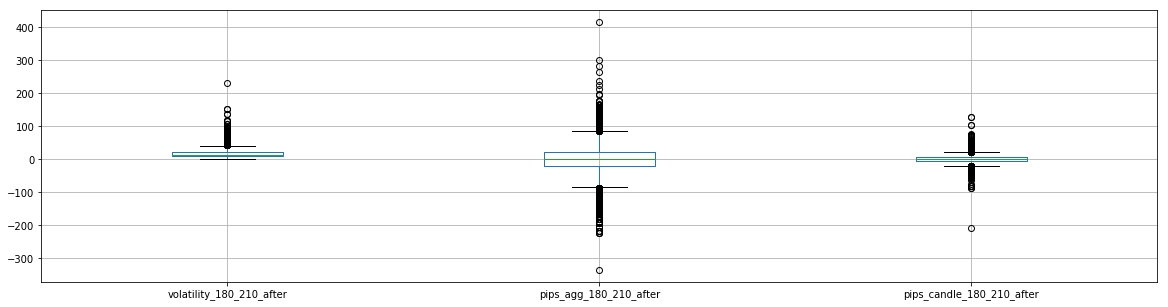

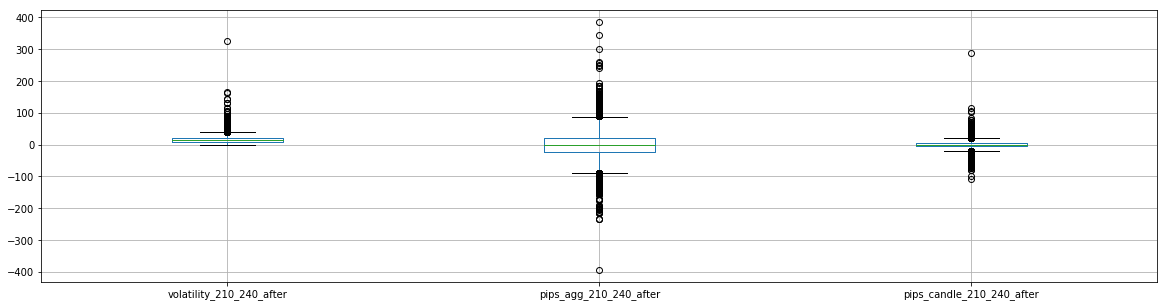

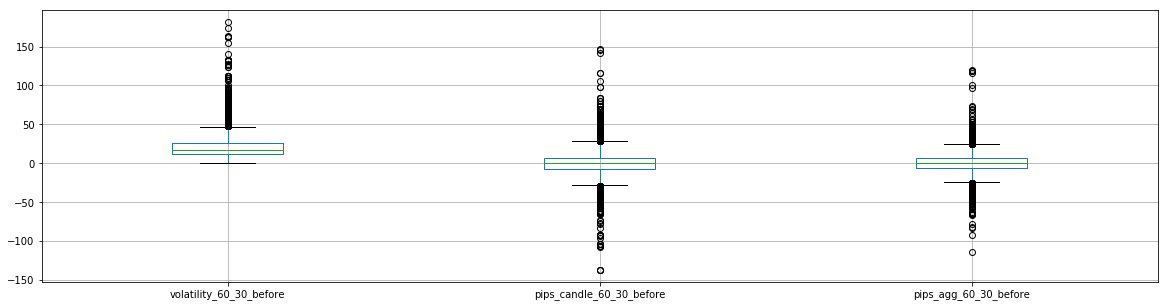

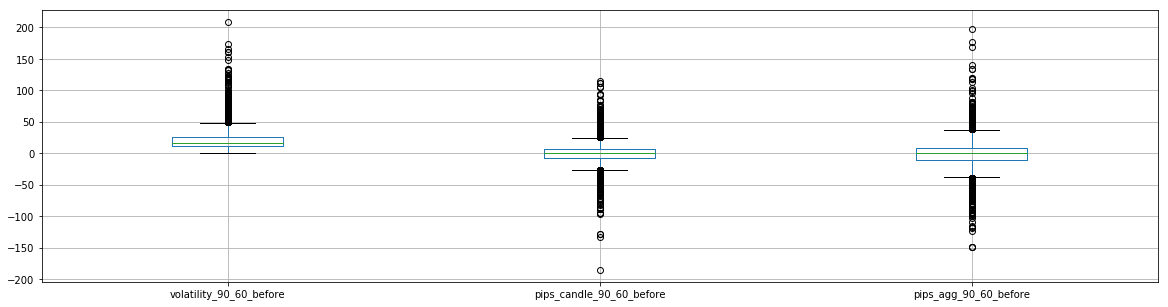

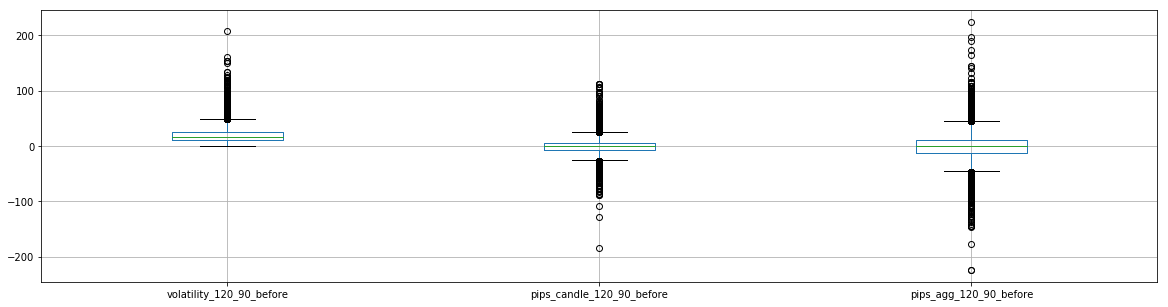

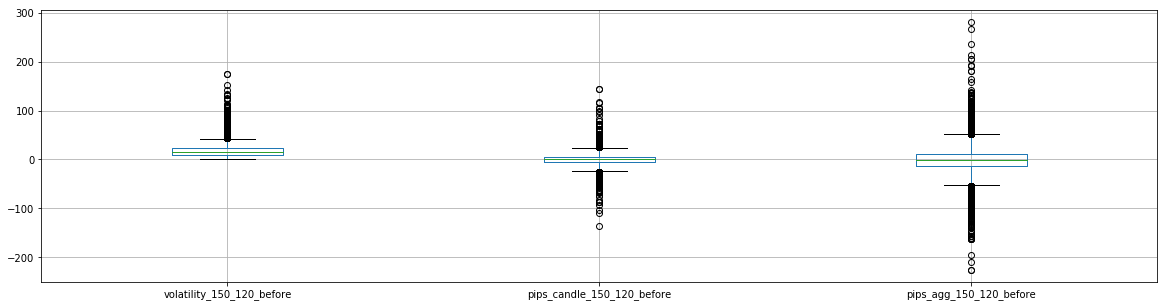

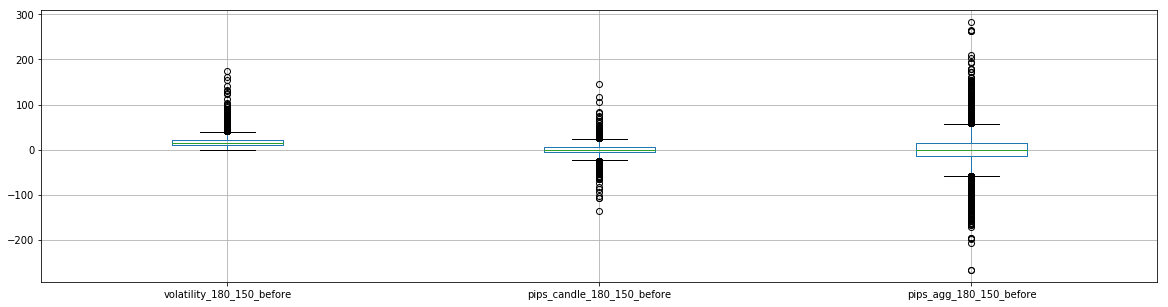

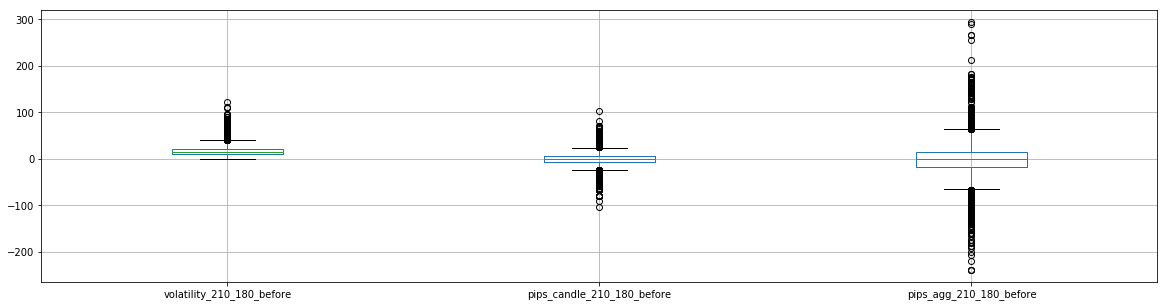

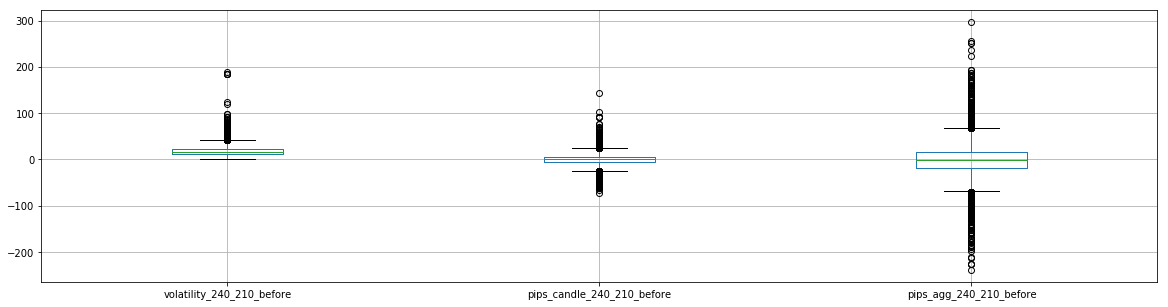

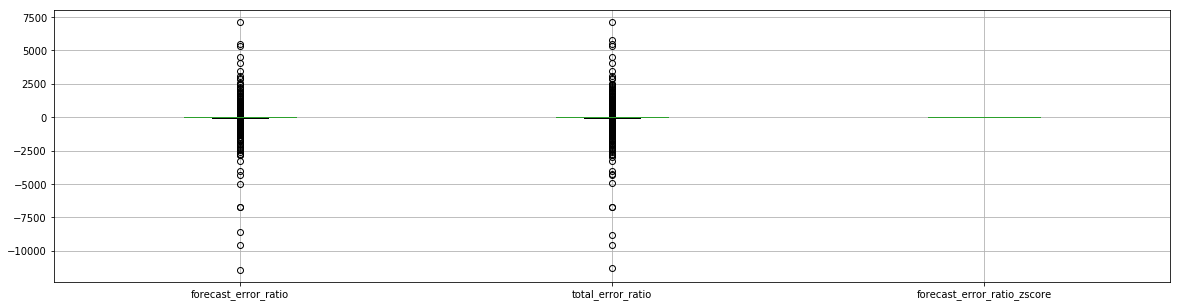

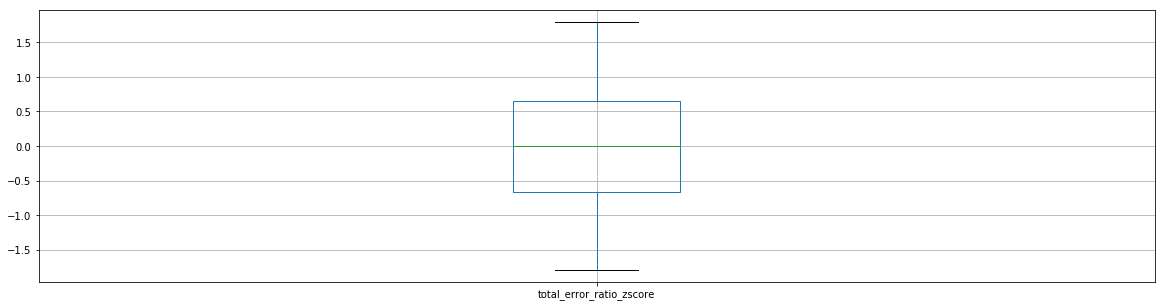

In [120]:
for i in range(0,len(columns_of_interest_numeric),3):
    df.boxplot(column=columns_of_interest_numeric[i:i+3],
               figsize=(20,5))
    plt.show()
    

In [62]:
df[columns_of_interest].describe()

NameError: name 'columns_of_interest' is not defined